In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df=pd.read_csv('tips.csv')

In [69]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [70]:
df1=df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [71]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns

catgorical_columns=df.select_dtypes(include=['object']).columns
catgorical_columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

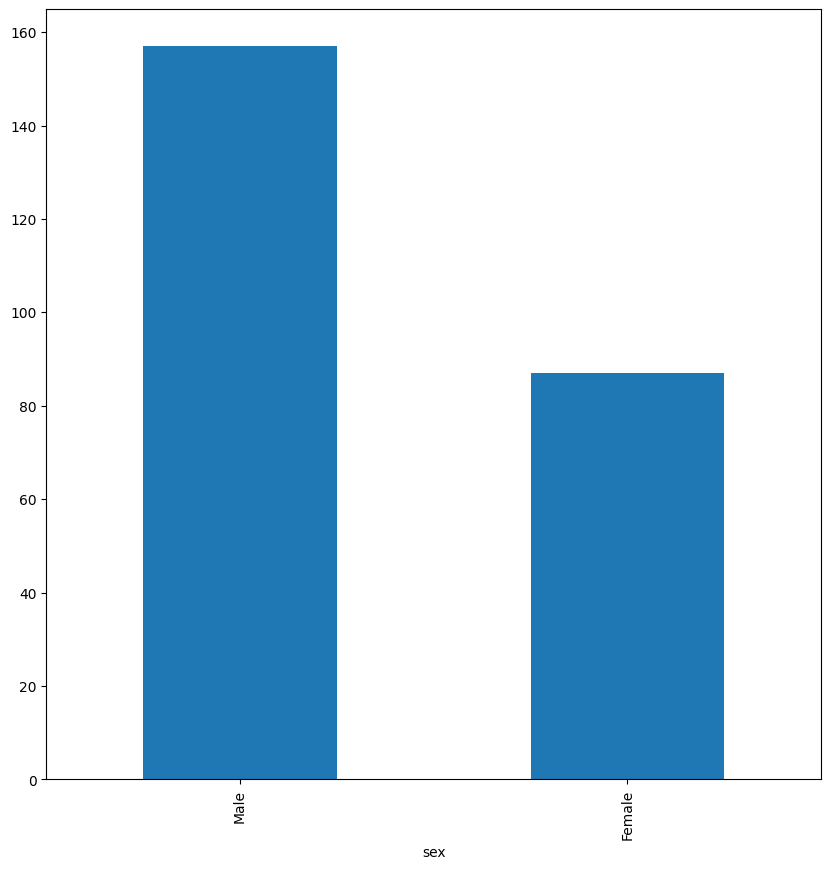

In [72]:
fig,ax=plt.subplots(figsize=(10,10))
df['sex'].value_counts().plot(kind='bar',ax=ax)

plt.show()


#Testing and debugging area

In [73]:
from sklearn.preprocessing import LabelEncoder
encoded_data= df.copy()

categorical_columns=df.select_dtypes(include=['object']).columns
encoder={} #store all the label encoder in this
for col in categorical_columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    encoder[col]=le  #incase reverse is ever required use this le.inverse_transform(that column)
encoded_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


#Scatter Plots

<Figure size 1000x800 with 0 Axes>

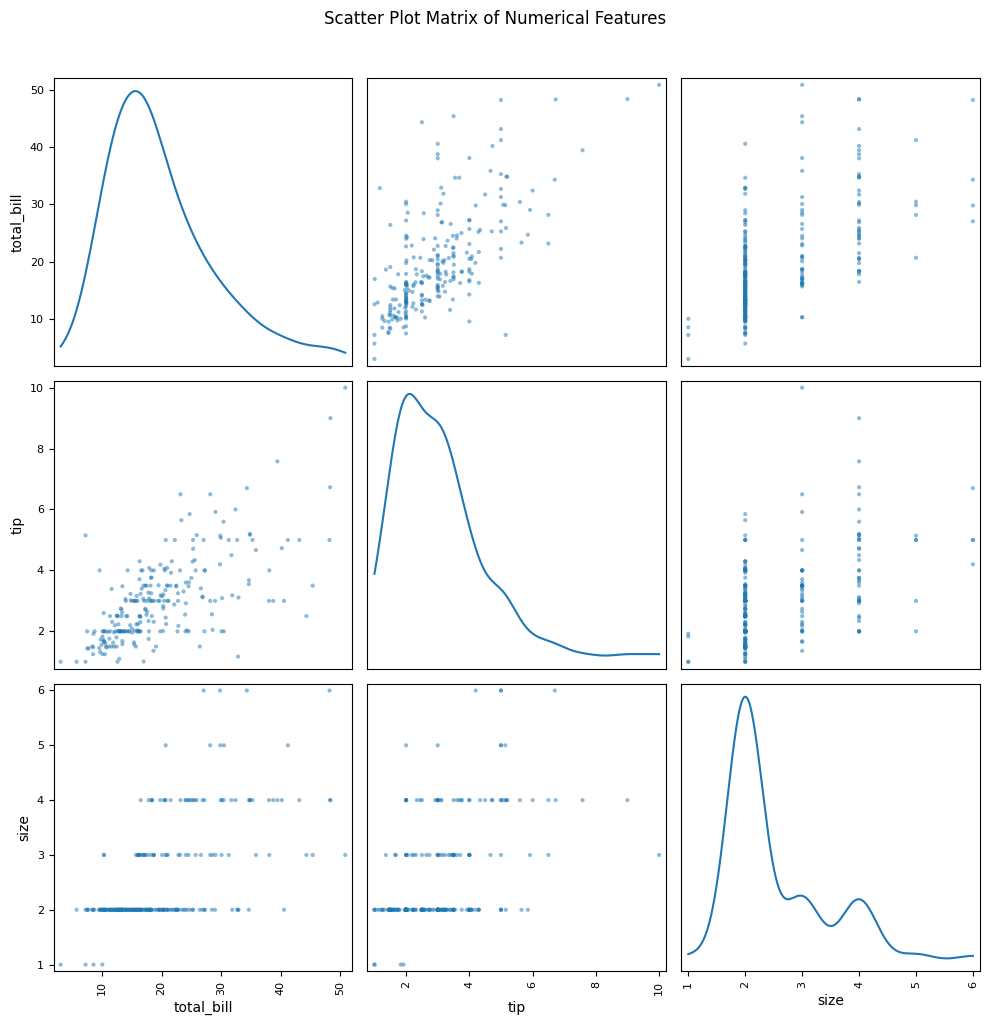

In [74]:
# 1. Scatter Plot Matrix for Numerical Features
plt.figure(figsize=(10, 8))
numerical_features = ['total_bill', 'tip', 'size']
scatter_matrix = pd.plotting.scatter_matrix(encoded_data[numerical_features], figsize=(10, 10),
                                  diagonal='kde', alpha=0.5)
plt.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

#Pair Plots


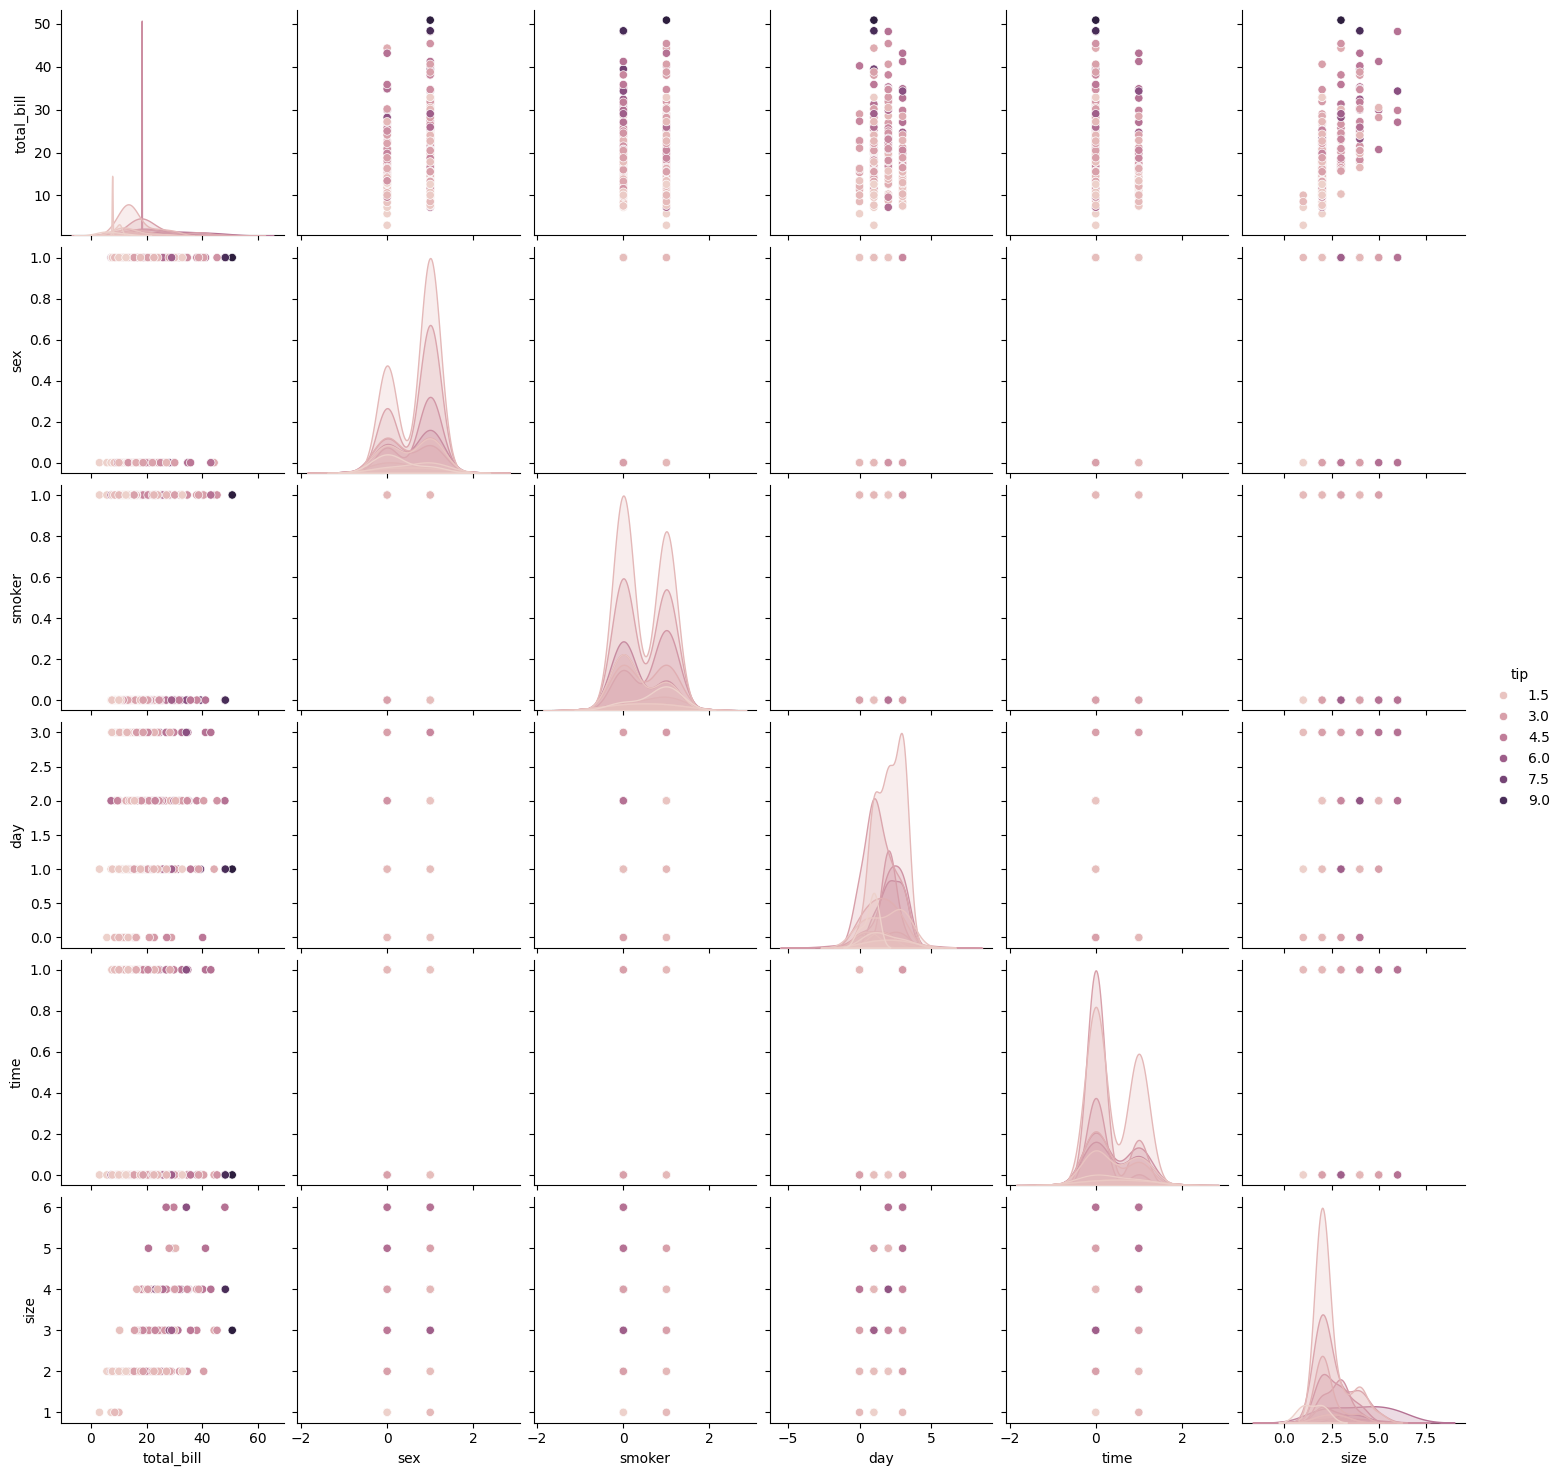

In [75]:
sns.pairplot(encoded_data, hue='tip')  # Use 'hue' to color by a categorical variable if applicable
plt.show()

#Residual Plots


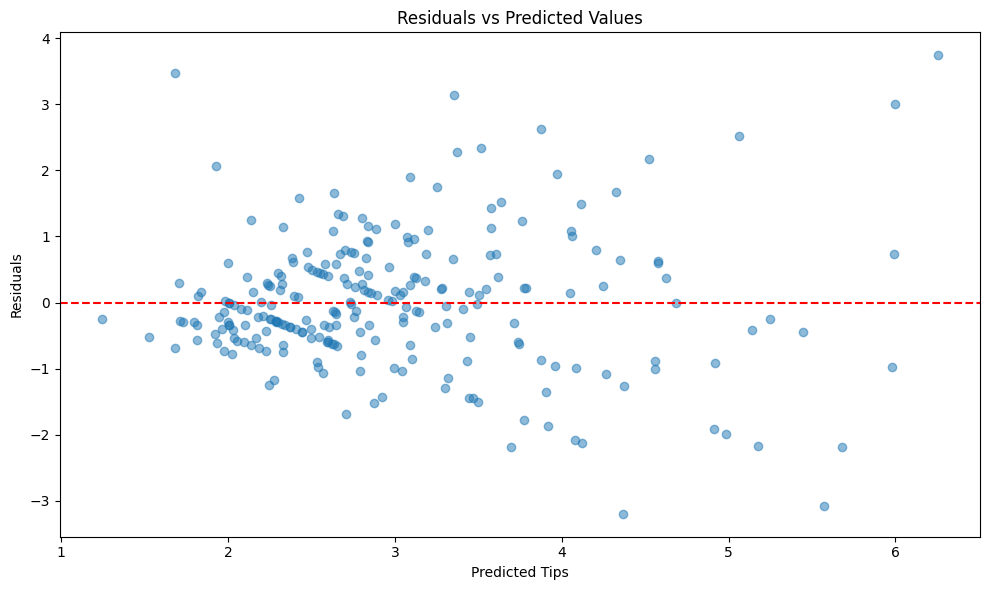

In [76]:
from sklearn.linear_model import LinearRegression
#Residuals Plot
model = LinearRegression()
X = encoded_data[['total_bill']]
y = encoded_data['tip']
model.fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tips')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()

#Line Plot (Time Series View)

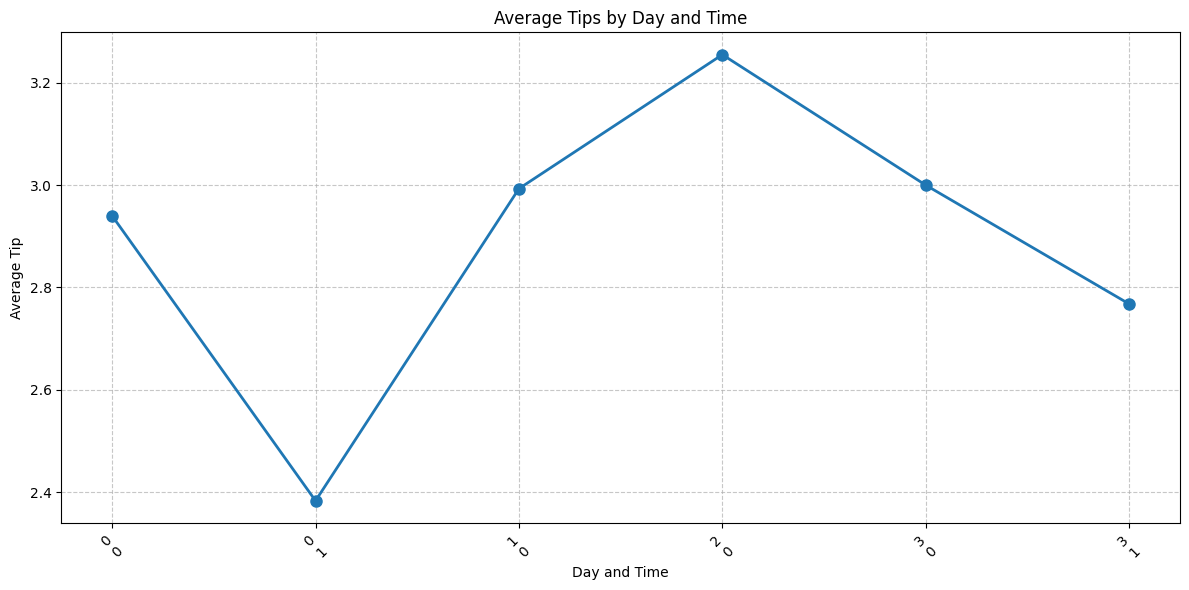

In [77]:

# Create time-based aggregation
time_series = encoded_data.groupby(['day', 'time'])['tip'].mean().reset_index()
time_series['time_index'] = range(len(time_series))

plt.figure(figsize=(12, 6))
plt.plot(time_series['time_index'], time_series['tip'],
         marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xticks(time_series['time_index'],
          [f"{day}\n{time}" for day, time in zip(time_series['day'], time_series['time'])],
          rotation=45)
plt.xlabel('Day and Time')
plt.ylabel('Average Tip')
plt.title('Average Tips by Day and Time')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Correlation Matrix

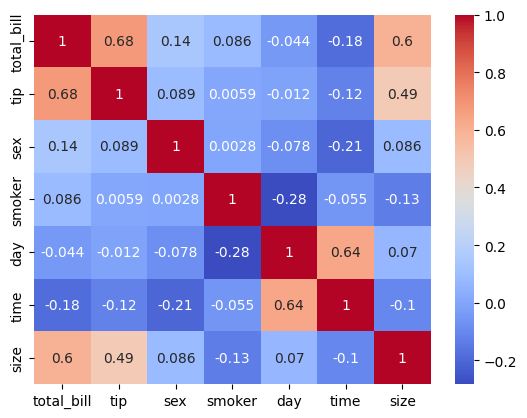

In [78]:
#correlation matrix and heat map
corr=encoded_data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#Rainbow test for linearity check


In [79]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag


encoded_data = pd.get_dummies(df, drop_first=True)
encoded_data = encoded_data.apply(lambda x: x.astype('int') if x.dtype == 'bool' else x)

# Example data
X = encoded_data.drop('tip',axis=1)  # Predictor variable(s)
y = encoded_data['tip']  # Response variable

# Fit the linear model
X = sm.add_constant(X)  # Add a constant term
model = sm.OLS(y, X).fit()

# Run the Rainbow test
rainbow_stat, p_value = diag.linear_rainbow(model)

# Output results
print("Rainbow Statistic:", rainbow_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Evidence of non-linearity.")
else:
    print("Do not reject the null hypothesis: Linear model may be appropriate.")

Rainbow Statistic: 1.197054547994589
p-value: 0.1658838305924099
Do not reject the null hypothesis: Linear model may be appropriate.


#Regression Methods

In [80]:
model_data ={'Model':[],'R2 Score':[],'RMSE':[]}

#Linear Regression

In [81]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

X=encoded_data.drop('tip',axis=1)
y=encoded_data['tip']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#scale the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train) #fit the data on the train X only but transform both train and test
X_test=scaler.transform(X_test)

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
model_data['Model'].append('Linear Regression')
model_data['R2 Score'].append(r2_score(y_test,y_pred))
model_data['RMSE'].append(rmse)
print('R2 Score:',r2_score(y_test,y_pred))

Mean Squared Error: 0.7033566017436103
R2 Score: 0.43730181943482516


#Ridge Regression and Lasso Regression

In [82]:
from sklearn.linear_model import Ridge, Lasso

# Initialize and fit the Ridge model
ridge_model = Ridge(alpha=1000)  #initially alpha=1 but after tuning 1000 is better 0.573067718160516
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate the model
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

print("Ridge Regression MSE:", ridge_mse)
print("Ridge Coefficients:", ridge_model.coef_)


Ridge Regression MSE: 1.426222419098523
Ridge Coefficients: [ 0.0349113   0.02512202  0.01256877 -0.00265657  0.00033427  0.01562871
 -0.01112491 -0.01580657]


In [83]:
# Initialize and fit the Lasso model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Make predictions and evaluate the model
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print("Lasso Regression MSE:", lasso_mse)
print("Lasso Coefficients:", lasso_model.coef_)

Lasso Regression MSE: 1.4486680232392768
Lasso Coefficients: [ 0.  0.  0. -0.  0.  0. -0. -0.]


In [84]:
#use random search cv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso

model1= Ridge()
model2= Lasso()

params_ridge={
    'alpha':[0.001,0.01,0.1,1,10,100,1000]
}
params_lasso={
    'alpha':[0.001,0.01,0.1,1,10,100,1000]
}

random_search_ridge=RandomizedSearchCV(
      estimator=model1,
      param_distributions=params_ridge,
      scoring='r2',
      n_iter=7,
      cv=5,
      verbose=0,
      random_state=42,
      n_jobs=-1
    )
random_search_lasso=RandomizedSearchCV(
      estimator=model2,
      param_distributions=params_lasso,
      scoring='r2',
      n_iter=7,
      cv=5,
      verbose=0,
      random_state=42,
      n_jobs=-1
    )

random_search_ridge.fit(X_train,y_train)
random_search_lasso.fit(X_train,y_train)

print('Ridge Best Score:',random_search_ridge.best_score_)
print('Ridge Best Params:',random_search_ridge.best_params_)
# Make predictions and evaluate the model
ridge_predictions = random_search_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
rmse=np.sqrt(mean_squared_error(y_test,ridge_predictions))
model_data['Model'].append('Ridge Regression')
model_data['R2 Score'].append(r2_score(y_test,ridge_predictions))
model_data['RMSE'].append(rmse)
print("Ridge Regression MSE:", ridge_mse)

print('Lasso Best Score:',random_search_lasso.best_score_)
print('Lasso Best Params:',random_search_lasso.best_params_)
# Make predictions and evaluate the model
lasso_predictions = random_search_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
rmse=np.sqrt(mean_squared_error(y_test,lasso_predictions))
model_data['Model'].append('Lasso Regression')
model_data['R2 Score'].append(r2_score(y_test,lasso_predictions))
model_data['RMSE'].append(rmse)

print("Lasso Regression MSE:", lasso_mse)


Ridge Best Score: 0.31924900996870964
Ridge Best Params: {'alpha': 1}
Ridge Regression MSE: 0.6900432829807397
Lasso Best Score: 0.32555363155211225
Lasso Best Params: {'alpha': 0.01}
Lasso Regression MSE: 0.6579709069996863


#Decision Tree

In [85]:
#decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
model_data['Model'].append('Decision Tree Regression')
model_data['R2 Score'].append(r2_score(y_test,y_pred))
model_data['RMSE'].append(rmse)

Mean Squared Error: 1.1469653061224492
R2 Score: 0.0824067203939568


#Random Forest

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Define parameter grid
param_grid = {'max_depth': [5, 10, 15, None],  # Try different depths including unlimited depth
              'n_estimators': [50, 100, 200]}

# Initialize and fit GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

y_pred=grid_search.predict(X_test)

print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
model_data['Model'].append('Random Forest Regression')
model_data['R2 Score'].append(r2_score(y_test,y_pred))
model_data['RMSE'].append(rmse)


Best parameters found: {'max_depth': 5, 'n_estimators': 100}
Mean Squared Error: 0.8973011076667134
R2 Score: 0.282142657861585


#Support Vector Regression

In [87]:
#SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

svr=SVR()

param_grid={
    'C':[0.1,1,10,100],
    'kernel':['linear','rbf','poly']
}

grid_search=GridSearchCV(estimator=svr,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5)
grid_search.fit(X_train,y_train)

svr= grid_search.best_estimator_

print('Best Parameters:',grid_search.best_params_)
y_pred=svr.predict(X_test)

print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
model_data['Model'].append('SVR')
model_data['R2 Score'].append(r2_score(y_test,y_pred))
model_data['RMSE'].append(rmse)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Mean Squared Error: 1.1014975389899522
R2 Score: 0.11878176795360607


#KNN Regression

In [88]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

knn=KNeighborsRegressor()

param_grid={
    'n_neighbors':[3,5,7,9,11,13,15],
    'weights':['uniform','distance']
}

grid_search=GridSearchCV(estimator=knn,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5)
grid_search.fit(X_train,y_train)

knn= grid_search.best_estimator_

print('Best Parameters:',grid_search.best_params_)
y_pred=knn.predict(X_test)

print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
model_data['Model'].append('KNN')
model_data['R2 Score'].append(r2_score(y_test,y_pred))
model_data['RMSE'].append(rmse)

Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Mean Squared Error: 1.037381005026419
R2 Score: 0.17007617098613326


#Comparisions across different models

In [89]:
data= pd.DataFrame(model_data)
#print data in a presentable way
print("Model Comparision:")
print(data.to_string(index=False))

Model Comparision:
                   Model  R2 Score     RMSE
       Linear Regression  0.437302 0.838664
        Ridge Regression  0.447953 0.830688
        Lasso Regression  0.473611 0.811154
Decision Tree Regression  0.082407 1.070965
Random Forest Regression  0.282143 0.947260
                     SVR  0.118782 1.049523
                     KNN  0.170076 1.018519


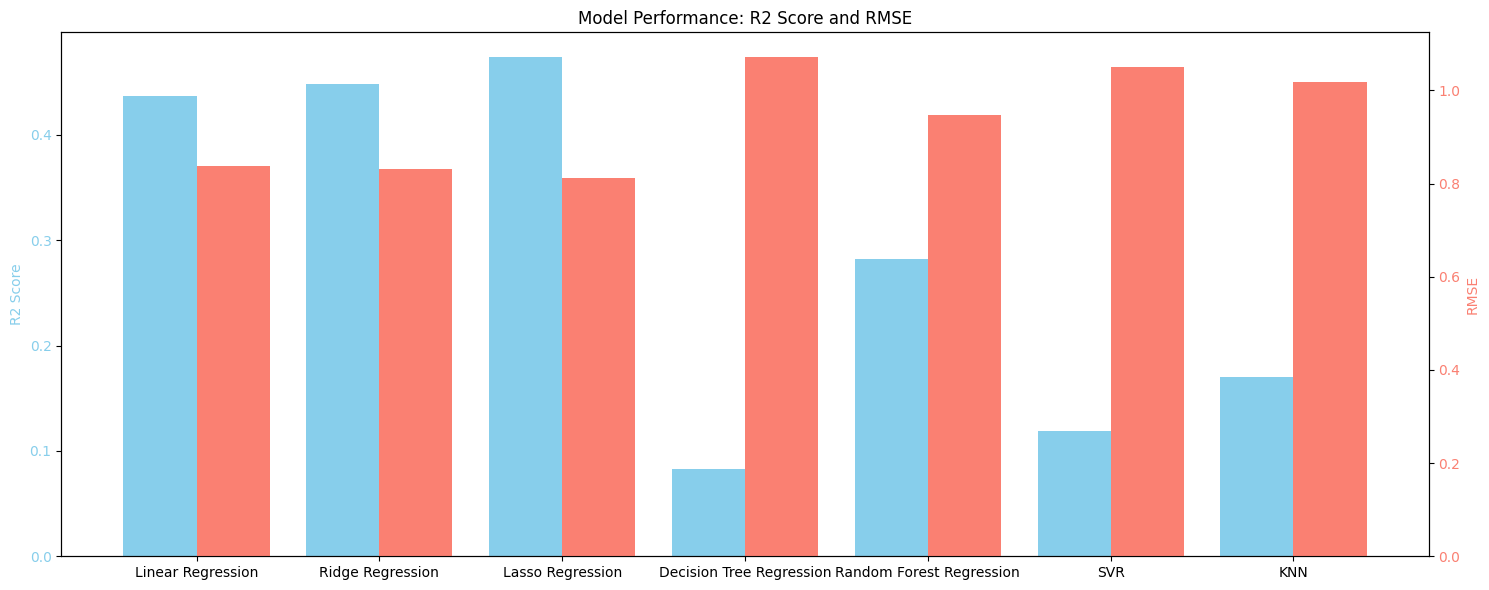

In [90]:
# Plotting
x = np.arange(len(data["Model"]))
fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar plot for R2 Score
ax1.bar(x - 0.2, data["R2 Score"], width=0.4, label="R2 Score", color="skyblue")
ax1.set_ylabel("R2 Score", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")

# Bar plot for RMSE
ax2 = ax1.twinx()
ax2.bar(x + 0.2, data["RMSE"], width=0.4, label="RMSE", color="salmon")
ax2.set_ylabel("RMSE", color="salmon")
ax2.tick_params(axis="y", labelcolor="salmon")

# Adjust x-ticks for better readability
plt.xticks(x, data["Model"], ha="right", fontsize=10)  # Rotate and adjust font size
plt.title("Model Performance: R2 Score and RMSE")
plt.tight_layout()
plt.show()

#CONCLUSION:
Based on the plot and performance metrics, Lasso Regression stands out with the highest R² score (0.473611) and lowest RMSE (0.811154), indicating it fits the data better than the other models in terms of both accuracy and error minimization. Ridge Regression and Linear Regression also perform relatively well, with similar but slightly lower R² scores and slightly higher RMSEs, making them reasonable choices depending on the specific context or constraints.

In contrast, Decision Tree Regression, Random Forest Regression, SVR, and KNN have lower R² scores and higher RMSE values, particularly SVR with the lowest R² (0.082407) and highest RMSE (1.070965). This suggests these models may be less suitable for this dataset, likely due to overfitting or inadequate capturing of underlying patterns.

Overall, Lasso Regression is recommended as the optimal model based on its balance of accuracy and low error, making it a reliable choice for predictive modeling in this case.